# ASSIGNMENT 5, QUESTION 2
## DETERMINE RIVER/NON RIVER PARTS OF AN IMAGE USING NAIVE BAYES 
#### SUBMITTED BY BHANU BHANDARI, IEC2016027

In [1]:
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt

We first import all the different image channels and later, combine them into a single image. 

In [2]:
image_i = imread('/Users/bhanubhandari/Downloads/images/4.gif')
image_b = imread('/Users/bhanubhandari/Downloads/images/3.gif')
image_g = imread('/Users/bhanubhandari/Downloads/images/2.gif')
image_r = imread('/Users/bhanubhandari/Downloads/images/1.gif')

From the data given to us in terms of river/non-river, we determine how many points lie on the river and how many do not. 

In [3]:
image_y = plt.imread('/Users/bhanubhandari/Downloads/images/PDCV1.jpeg')
image_y = (image_y>(0.5*255))*1
river_number = np.sum(image_y==1)

In [4]:
river_number

9449

Once we obtain that data, we then move forward towards selecting 50 random points from the non-river class and 100 random points from the river class. 

In [5]:
image_y = image_y.flatten()
river_mask = np.floor(np.random.rand(50)*river_number)
print(river_mask)
j = 0
river_class = []
for i in range(512*512):
    if(image_y[i] == 1):
        j += 1
        if j in river_mask:
            river_class.append(i)
print(river_class)

[5804. 1346. 1557. 3015. 6750. 8302. 7370. 2776. 3646. 1999. 5002. 3311.
  427. 5847. 4872.  268. 5242. 8620. 7906. 1190. 4974. 9203. 3036. 4972.
 3182. 9082. 1171. 5231. 2665. 2258.  166. 1818. 7091. 5604. 7807. 6555.
 4772. 3359. 1036. 3892. 8511.  254. 3707. 7815. 4197. 1517. 7473.  878.
  736. 3618.]
[4247, 6303, 6809, 10401, 18079, 21674, 26271, 29868, 30383, 35506, 41645, 42680, 51884, 56504, 63149, 72370, 74923, 81056, 81570, 85666, 89756, 91292, 99491, 100014, 102054, 107696, 114872, 128198, 130754, 133315, 133317, 133838, 139986, 140491, 150235, 155858, 156884, 171724, 175311, 181971, 189626, 193211, 206524, 207032, 212150, 229554, 235694, 238760, 250528, 254102]


In [6]:
non_river_number = np.sum(image_y == 0)
non_river_mask = np.floor(np.random.rand(100)*non_river_number)
print(non_river_mask)
j = 0
non_river_class = []
for i in range(512*512):
    if(image_y[i] == 0):
        j += 1
        if j in non_river_mask:
            non_river_class.append(i)
print(non_river_class)

[247911. 112438.  49009.  14306. 247448. 111022. 232172.  72087. 211331.
 141765.  36322. 173233. 126261.  61200.   1562.  14709. 114439. 239047.
 139657. 161805. 228823. 219248. 154955. 201055.  44312. 204458.  56703.
 237158.  33099.  25223.  10561.  51238. 251308.  65574. 147913. 133597.
 196319.  53885. 102378. 179384. 163273.  71759. 140180.   1831.  95374.
 188919. 212758. 166806. 203190.  45919. 123194. 142378.  51011.  98645.
 112870. 189400. 229193.  84736.  41131. 155666.  87956. 113429.  78486.
 218975.   4880. 212514. 199461.  85880.  86189. 159039. 184773.   7268.
  61738. 248632. 114283.  77022.  16191. 193225. 151114.  61920. 214263.
 251100. 251366.  89660. 112275.  65585.  99791. 213559.  17030. 195774.
  23419. 199968. 106863. 198694. 133007.  93171.  65758.    312. 159186.
 139262.]
[330, 1619, 1907, 5075, 7566, 11016, 14912, 15336, 16879, 17757, 24395, 26256, 34402, 37729, 42687, 45958, 47610, 50792, 52859, 53103, 55842, 58782, 63468, 64028, 64232, 68039, 68050, 682

Once we have done this, we move towards calculating the means for each of the four classes for all of our test data. 

(512, 512, 4)
[44.26 30.26 31.28 21.36] [40.88 25.88 26.59 34.88]


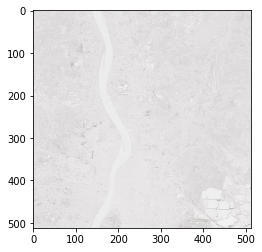

In [7]:
test_data = np.dstack((image_r, image_g, image_b, image_i))
test_data_copy = test_data
print(test_data.shape)
plt.imshow(test_data)
test_data = test_data.reshape(-1,4)
mean_river = np.mean(test_data[river_class],axis=0)
mean_non_river = np.mean(test_data[non_river_class],axis=0)
print(mean_river, mean_non_river)

For calculating the probability distribtion, we calculate the 4x4 covariance matrix from the test data we have recently constructed. 

In [8]:
test_data = test_data.reshape(-1,4)
cov_river = np.cov(test_data[river_class].T)
cov_non_river = np.cov(test_data[non_river_class].T)
print(cov_river)
print(cov_non_river)
print(cov_river.shape, cov_non_river.shape)

[[ 0.7677551   0.33918367  0.08897959  0.39428571]
 [ 0.33918367  0.6044898   0.21142857 -0.29959184]
 [ 0.08897959  0.21142857  0.49142857 -0.14367347]
 [ 0.39428571 -0.29959184 -0.14367347  2.39836735]]
[[ 6.18747475  5.25818182  7.21292929  2.09656566]
 [ 5.25818182  5.48040404  7.20282828  4.06626263]
 [ 7.21292929  7.20282828 13.51707071  2.62707071]
 [ 2.09656566  4.06626263  2.62707071 30.26828283]]
(4, 4) (4, 4)


We now compute the river class by using the formula of $$\sum(X_i-\mu_(river))^T(\Sigma)^{-1}(X_i-\mu_(river))$$

In [9]:
river_1 = np.zeros(512*512)
for i in range(512*512):
    river_1[i] = (test_data[i] - mean_river).T@np.linalg.inv(cov_river)@(test_data[i] - mean_river)

In [10]:
river_1
len(river_1)

262144

We now compute the non-river class by using the formula of $$\sum(X_i-\mu_(nonriver))^T(\Sigma)^{-1}(X_i-\mu_(nonriver))$$

In [11]:
non_river_1 = np.zeros(512*512)
for i in range(512*512):
    non_river_1[i] = (test_data[i] - mean_non_river).T@np.linalg.inv(cov_non_river)@(test_data[i] - mean_non_river)

In [12]:
non_river_1

array([2.46227064, 2.24028046, 4.51312854, ..., 6.01152656, 5.82373754,
       8.59114558])

We now calculate the required probabilities for the multivariate normal distribution for both river and non-river classes over each pixel. 

### RIVER

In [13]:
p1 = ((1/np.sqrt(2*3.14159))**(50))*(1/np.sqrt(np.linalg.det(cov_river)))*np.exp((-1/2)*river_1)
print(p1)
p1.shape

[6.76911676e-087 1.07042885e-073 4.06090418e-088 ... 1.76404920e-083
 8.02937768e-100 1.40158574e-085]


(262144,)

### NON-RIVER

In [14]:
p2 = ((1/np.sqrt(2*3.14159))**100)*(1/np.sqrt(np.linalg.det(cov_non_river)))*np.exp((-1/2)*non_river_1)
print(p2)

[1.50119722e-42 1.67742189e-42 5.38393264e-43 ... 2.54522759e-43
 2.79578962e-43 7.00760264e-44]


## GENERATE RESULTS 
We now generate the output images as results using different apriori probabilities of river/non-river. 
#### P1 = 0.3, P2 = 0.7

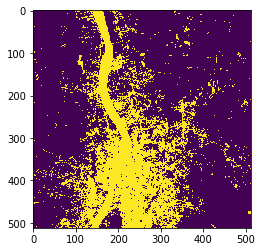

In [15]:
output_image = []
P1 = 0.3
P2 = 0.7
output_image = (P1*p1>=P2*p2)*255
output_image = output_image.reshape(512,512)
plt.imshow(output_image)

#### P1 = P2 = 0.5

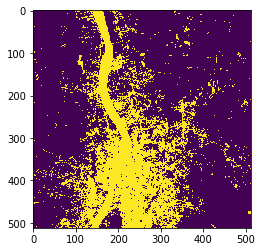

In [16]:
output_image_1 = []
P1 = 0.5
P2 = 0.5
output_image_1 = (P1*p1>=P2*p2)*255
output_image_1 = output_image.reshape(512,512)
plt.imshow(output_image_1)

### P1 = 0.7, P2 = 0.3

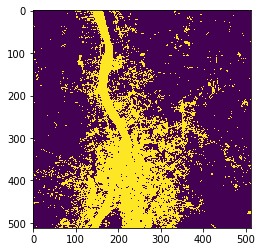

In [17]:
output_image = []
P1 = 0.7
P2 = 0.3
output_image = (P1*p1>=P2*p2)*255
output_image = output_image.reshape(512,512)
plt.imshow(output_image)

### SUMMARY 
In this assignment, we have successfully demarcated a number of points as belonging to a river or not based on a set of 50 points to train the river class and 100 points to train the non river class. Further, we found the probabilities of a point in the river class lying within a certain range of pixel values, and the same was performed for the non river class as well. Although the accuracy is not the best, it is certainly good enough to roughly tell which points belong to those ranges and which do not. 